# Jonathan Halverson
# Saturday, December 30, 2017
# Overcomplete autoencoder

Here the number of neurons in the single hidden layer is four times that of the number of inputs. This will prove to lead to a very small reconstruction loss but a terrible set of codings. The encoder is simply learning how to match the outputs to the inputs.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


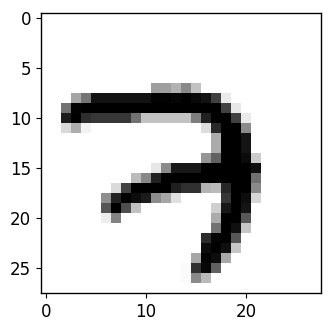

In [3]:
plt.imshow(mnist.train.images[0].reshape(28, 28), cmap='binary')

In [4]:
tf.reset_default_graph()

In [5]:
n_inputs = 28 * 28
n_units = 2 * n_inputs
n_outputs = n_inputs

In [6]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs), name="X")
hidden = tf.layers.dense(X, n_units, activation=None, name='overcomplete')
outputs = tf.layers.dense(hidden, n_outputs, activation=None, name='outputs')

In [7]:
reconstruction_loss = tf.reduce_mean(tf.square(X - outputs))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
training_op = optimizer.minimize(reconstruction_loss)

In [8]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()

In [9]:
batch_size = 200
epochs = 20
codings = hidden

In [10]:
with tf.Session() as sess:
     init.run()
     for epoch in xrange(epochs + 1):
          for iteration in xrange(mnist.train.num_examples // batch_size):
               X_batch, _ = mnist.train.next_batch(batch_size)
               sess.run(training_op, feed_dict={X:X_batch})
          if not (epoch % 2): print epoch, reconstruction_loss.eval(feed_dict={X:mnist.validation.images})
     save_path = saver.save(sess, '/tmp/data/overcomplete.ckpt')

0 0.00121649
2 8.25656e-05
4 3.41855e-05
6 0.000116566
8 5.25564e-05
10 7.6959e-05
12 9.87058e-05
14 0.00010857
16 9.30707e-05
18 5.22658e-05
20 2.70251e-05


In [19]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

INFO:tensorflow:Restoring parameters from /tmp/data/overcomplete.ckpt


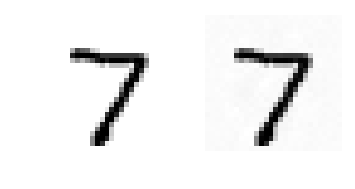

In [20]:
with tf.Session() as sess:
     saver.restore(sess, '/tmp/data/overcomplete.ckpt')
     codings_train = codings.eval(feed_dict={X:X_train})
     codings_test = codings.eval(feed_dict={X:X_test})
     outputs_test = outputs.eval(feed_dict={X:X_test})
     
     plt.subplot(131)
     plt.imshow(X_test[0].reshape(28, 28), cmap='binary'); plt.axis('off')
     plt.subplot(132)
     #plt.imshow(codings_test[0].reshape(56, 56), cmap='binary'); plt.axis('off')
     #plt.subplot(133)
     plt.imshow(outputs_test[0].reshape(28, 28), cmap='binary'); plt.axis('off')

In [21]:
from sklearn.linear_model import SGDClassifier

SGDClassifier(loss='log', random_state=42, tol=1e-4).fit(codings_train, y_train).score(codings_test, y_test)

0.91400000000000003